# Module 1: Data Science Fundamentals

## Sprint 2: Statistical Tests and Experiments

## Let's analyse Udacity A/B test!

<div><img style="height: 350px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3b/Udacity_logo.png" /></div>

## Background

For the last day of this sprint, we are analyzing once run, online Udacity A/B test results! The dataset is part of the Udacity Google's A/B testing course, which we have watched a couple of lessons from in Subproject 2 of this sprint.

Data is available at https://docs.google.com/spreadsheets/d/1Mu5u9GrybDdska-ljPXyBjTpdZIUev_6i7t4LRDfXM8/edit#gid=0

---------

## How to start?

The data consists of two sheets, each for different group of the test. Download the sheets as CSVs and union them to form 1 dataset.

## Concepts to explore

You will mostly focus on statistical hypothesis testing in this project on real-life data.

## Requirements

* Visualize 95% confidence interval between control and experiment groups on [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate) metric. Explain what the confidence interval means, what's the relationship with the population of a group.
* Verify that the difference in each of the metrics between control and experiment groups is statistically significant using z-test, 95% confidence level.
* Verify that the difference in each of the metrics between control and experiment groups is statistically significant using t-test, 95% confidence level.
* Compare both test method results. Explain why they differ / do not differ that much and why.
* Choose 1 method (either z or t) and explore statistical significance of any metric under different confidence levels - 60%, 90%, 95%, 99%. If conclusions about significance differ under different confidence levels, explain why.
* Calculate p-values.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import ttest_ind
import scipy.stats
import statsmodels.stats.weightstats as st
from statsmodels.stats.proportion import proportion_confint

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
control = pd.read_csv('https://raw.githubusercontent.com/Rafiatu/training/master/Final%20Project%20Results%20-%20Control.csv')
experiment = pd.read_csv('https://raw.githubusercontent.com/Rafiatu/training/master/Final%20Project%20Results%20-%20Experiment.csv')
control['group'] = ['control' for i in control['Pageviews']]
experiment['group'] = ['experiment' for i in experiment['Pageviews']]
union = pd.concat([control, experiment])

## Hypotheses

Null Hypothesis: No significant difference between the experiment and control groups.



Alternate Hypothesis: The experiment group has a higher click through rate than the control group.

## Sanity Checks

Plotting the distribution of target and control group

In [12]:
mean_cont = control['CTR%'].mean()
mean_exper = experiment['CTR%'].mean()
cont_size = control['CTR%'].count()
exper_size = experiment['CTR%'].count()
cont_std = control['CTR%'].std()
exper_std = experiment['CTR%'].std()
mean_diff = mean_exper - mean_cont
pooled_std = sqrt((((cont_size-1)*(cont_std**2)) + ((exper_size-1)*(exper_std**2))) / (cont_size + exper_size-2) )
z_critic = scipy.stats.norm.ppf(1-0.05/2)  # at 95% confidence level

In [13]:
cob = ((pooled_std / sqrt(cont_size + exper_size)) * z_critic)
upper_CI, lower_CI = (mean_diff - cob, mean_diff + cob) 

In [14]:
print(upper_CI, lower_CI)

-0.0008610295490244749 0.001191643940240125


## 95% Confidence Interval between both groups

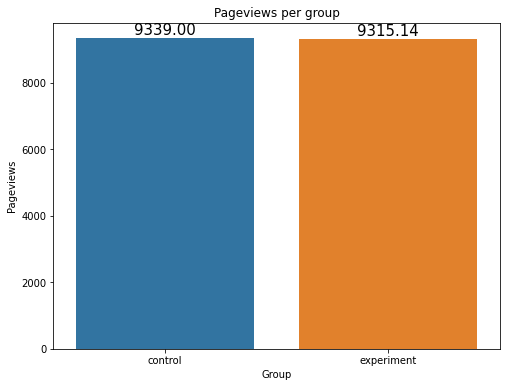

In [34]:
plt.figure(figsize=(8,6))

plots = sns.barplot(x=union['group'], y=union['Pageviews'], ci=False)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Pageviews per group')
plt.xlabel('Group')
plt.ylabel('Pageviews');

In [6]:
# The difference between the total numbers of each pageview
control['Pageviews'].sum() - experiment['Pageviews'].sum()

883

In [7]:
# The standard deviation of the
SD = sqrt((0.5 * 0.5)/union['Clicks'].sum())
SD

0.002099747079699252

In [8]:
z_score = 1.96 # at 95% confidence level
error_margin = SD * z_score
error_margin

0.0041155042762105335

In [28]:
conf_interval = [0.5 - error_margin, 0.5 + error_margin]
conf_interval

[0.49588449572378945, 0.5041155042762105]

From the previous two lines of code we can tell that the values we have are within the range so we can proceed with other calculations.


In [2]:
# Click through rate per day for each group
control['CTR%'] = [i for i in (control['Clicks'] / control['Pageviews'])]
experiment['CTR%'] = [i for i in (experiment['Clicks'] / experiment['Pageviews'])]

In [8]:
# Estimated click through rate for the control group
control_CR = (control['Clicks'].sum() / control['Pageviews'].sum())
print(f'{control_CR:.2f}')

0.08


In [9]:
# Estimated click through rate for the treatment group
experiment_CR = (experiment['Clicks'].sum() / experiment['Pageviews'].sum())
print(f'{experiment_CR:.2f}')

0.08


The click through rate for the control group is basically the same as the click through rate for the experiment group.

In [ ]:
# Difference between the click through rates
d_hat = (experiment_CR - control_CR) / 100
d_hat

5.662709158691826e-05

## Z test at 95% confidence level


In [ ]:
n_con = control['Pageviews'].sum()
n_treat = experiment['Pageviews'].sum()
successes = [control['Clicks'].s, experiment['Clicks'].sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

z statistic: -0.086
p-value: 0.932
ci 95% for control group: [0.081, 0.083]
ci 95% for treatment group: [0.081, 0.083]


In [20]:
cont = st.DescrStatsW(control['CTR%'])
exper = st.DescrStatsW(experiment['CTR%'])
cm_object = st.CompareMeans(cont, exper)
ztest, pval = cm_object.ztest_ind(usevar='unequal')
print(f'z_val is {ztest}', f'p_val is {pval}')

z_val is -0.08302608446563484 p_val is 0.9338307988101693


The z value is in within our critical value of +/- 1.96. The p value is also greater than our 0.05 threshold so we cannot reject the Null Hypothesis. 


## T test at 95% confidence level

In [3]:
# Degree of freedom
df1 = control['Clicks'].count() - 1
df2 = experiment['Clicks'].count() - 1
freedom = df1 + df2
freedom

72

In [4]:
print('t_critic', scipy.stats.t.ppf(0.025, 72))
ttest,pval = ttest_ind(control['CTR%'], experiment['CTR%'], equal_var=False)
print(f't_val is {ttest}', f'p_val is {pval}')

t_critic -1.9934635662785831
t_val is -0.08302608446561602 p_val is 0.9340614866433883


Calculated t value of 0.0830 is within expected value range of +/-1.993. P value is also greater than 0.05 threshold. Based on this result, we cannot reject the null hypothesis.

#### The t test and the z test concluded the same result because of the large sample size. For a Large Sample, we have a high degree of freedom. And since t-distribution approaches the normal distribution, the difference between the z score and t score is negligible. 

## T test at 60% Confidence Level


In [5]:
# Enrollments and Payments columns have nan values so I drop rows that contain nan values
control = control.dropna()
experiment = experiment.dropna()
freed = (control['Enrollments'].count() - 1) + (experiment['Enrollments'].count() - 1)
freed

44

In [7]:
# Here I used the Enrollment for users that clicked
# critical t value at 60% confidence level is 
print('t_crtic at 60% CL is', scipy.stats.t.ppf(0.2, 44))
ttest,pval = ttest_ind(control['Enrollments'], experiment['Enrollments'], equal_var=False)
print(f't_val is {ttest}', f'p_val is {pval}')

t_crtic at 60% CL is -0.8498668047586602
t_val is 1.686512674290538 p_val is 0.09885080214900278


## T test at 90% Confidence Level


In [8]:
# Here I used the Enrollment for users that clicked
# critical t value at 90% confidence level is 
print('t_critic at 90% CL is', scipy.stats.t.ppf(0.05, 44))
ttest,pval = ttest_ind(control['Enrollments'], experiment['Enrollments'], equal_var=False)
print(f't_val is {ttest}', f'p_val is {pval}')

t_critic at 90% CL is -1.680229975365252
t_val is 1.686512674290538 p_val is 0.09885080214900278


From the above, the t statistic is greater than the critical value of 1.680 and the p_value is less than the alpha of 0.1 so we can reject the null hypothesis


## T test at 99% Confidence Level

In [9]:
# Here I used the Enrollment for users that clicked
# critical t value at 99% confidence level is 
print('t_critic at 99% CL is', scipy.stats.t.ppf(0.005, 44))
ttest,pval = ttest_ind(control['Enrollments'], experiment['Enrollments'], equal_var=False)
print(f't_val is {ttest}', f'p_val is {pval}')

t_critic at 99% CL is -2.692278265693017
t_val is 1.686512674290538 p_val is 0.09885080214900278


## Evaluation Criteria

- Correctness of used test methods.
- Soundness of explanations given.
- Adherence to the requirements.


## Sample correction questions

During a correction, you may get asked questions that test your understanding of covered topics.

- Why collect data from sample rather than data from a population?
- What is the Central Limit Theorem and why is it important?
- Explain confidence intervals and significance in statistics
- Explain what p-value is